In [1]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
from IPython import display 
import numpy as np
import PIL.Image 
from TawnCam import PiCamera
import time
import cv2

camera = PiCamera(image_w=64, image_h=64, image_d=3, framerate=10)

images=['rectangle','circle']

RED = np.array([255,0,0])
GREEN = np.array([0,255,0])
BLUE = np.array([0,0,255])
BLACK = np.array([0,0,0])
Color =[RED, GREEN,BLUE,BLACK]


0 1
cropped


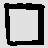

border for square


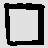

resize


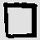

In [ ]:
while True:
    command = input("start:")  
    if command in images :
        print(command)
        while True:
            img = camera.run()
            img = cv2.flip(img, -1)
            NO_img = False

            Point = [0,63,0,63]     # first black finding location 
            Check= [True, True, True, True] # finding.. true, foiund false
            Increase = [1,-1,1,-1]  # moving direction

            top = 0       # all those shrink to center for find black.
            bottom = 63
            left = 0   
            right = 63

            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            gray = cv2.threshold(gray, 80, 225, cv2.THRESH_BINARY)[1]
            while Check[0] or Check[1] or Check[2] or Check[3] :
                #for Top and Bottom
                for i in range(2):
                    if Check[i] :
                        for x in range(Point[2], Point[3], 3):
                            if gray.item (Point[i], x) == 0:
                                img[Point[i], x-1] = Color[i]
                                img[Point[i], x] = Color[i]
                                img[Point[i], x+1] = Color[i]
                                Check[i] = False
                        Point[i] += Increase[i]*1
                #for Left and Right        
                for i in range(2,4):
                    if Check[i] :
                        for y in range(Point[0], Point[1], 3):
                            if gray.item (y, Point[i]) == 0:
                                img[y-1, Point[i]] = Color[i]
                                img[y, Point[i]] = Color[i]
                                img[y + 1,Point[i]] = Color[i]
                                Check[i] = False
                        Point[i] += Increase[i]*1

                if Point[0]>Point[1] or Point[2]>Point[3] :
                    NO_img = True
                    break

            if not NO_img:
                Point[0] = max(0, Point[0]-4)
                Point[1] = min(63, Point[1]+4)
                Point[2] = max(0, Point[2]-4)
                Point[3] = min(63, Point[3]+4)

                cropped = gray[Point[0]:Point[1],Point[2]:Point[3]]

                v_len = Point[1]- Point[0]
                h_len = Point[3]- Point[2]

                len = max(v_len,h_len)
                v_extend = int((len-v_len)/2)
                h_extend = int((len-h_len)/2)
                print(v_extend, h_extend)

                if len < 50 :
                    border = cv2.copyMakeBorder(cropped, v_extend, v_extend,  h_extend, h_extend, cv2.BORDER_CONSTANT, value=[225])
                    #border = cv2.copyMakeBorder(cropped, top=10, bottom=10, left=10, right=10, borderType= cv2.BORDER_CONSTANT, value=[1]) 
                    result = cv2.resize(border, (40,40), interpolation=cv2.INTER_CUBIC)

                    print('cropped')
                    display.display(PIL.Image.fromarray(border))
                    print('border for square')
                    display.display(PIL.Image.fromarray(border))
                    print('resize')
                    display.display(PIL.Image.fromarray(result))
                    if input("take photo?") != 'n':    
                        file_name = "/home/pi/zumi/sample/deep-learning-demos/arrow/images/" +command +"/" +str(time.time()) + "." + command  + ".jpg"
                        cv2.imwrite(file_name, result)

            else :
                print("NO DRAWS")

            display.display(PIL.Image.fromarray(gray))
            display.clear_output(wait=True)
